<a href="https://colab.research.google.com/github/brijesh486/pandas_numpy_viz/blob/main/Logistic_Regression_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,log_loss
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('admission.csv')

In [3]:
df.shape

(400, 4)

In [4]:
df.head()

,ADMIT,GRE,GPA,RANK
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [5]:
### missing values
df.isnull().sum()

,0
ADMIT,0
GRE,0
GPA,0
RANK,0


In [6]:
### duplicates
df.duplicated().sum()

np.int64(5)

In [7]:
df.drop_duplicates(inplace=True,ignore_index=True)

In [8]:
df.duplicated().sum()

np.int64(0)

<Axes: >

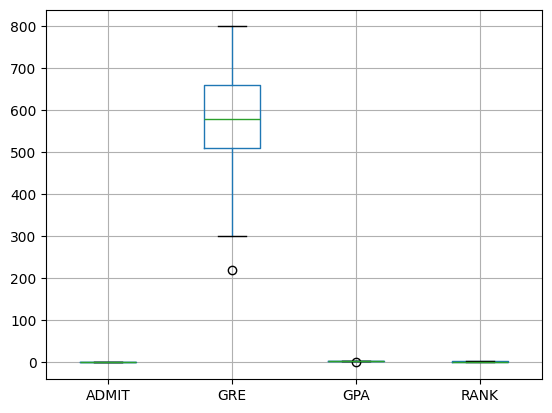

In [9]:
df.boxplot()

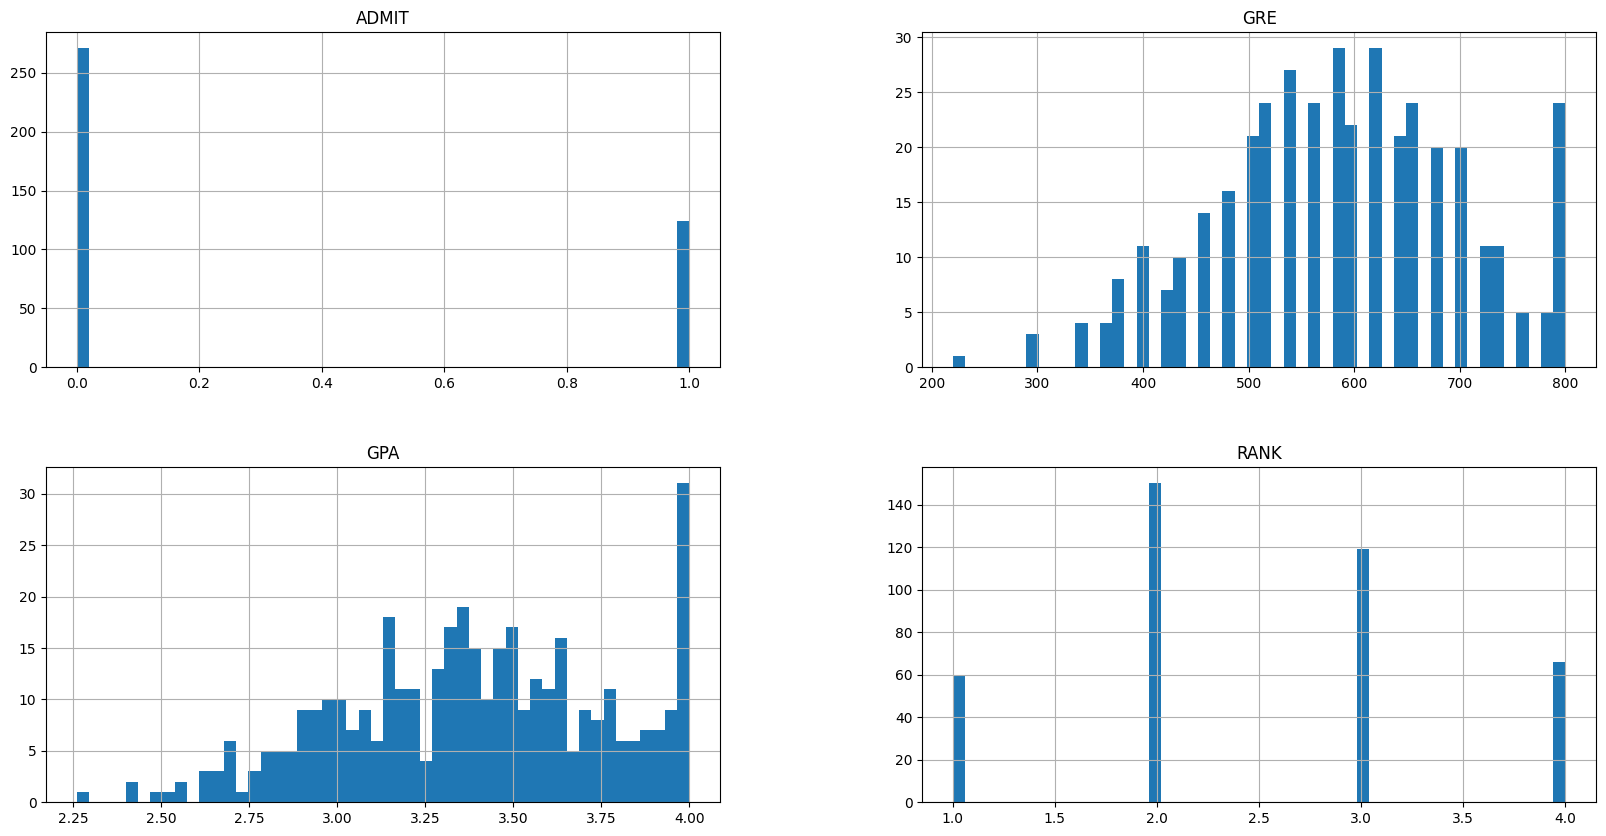

In [10]:
df.hist(bins=50,figsize=(20,10))
plt.show()

In [11]:
df.ADMIT.value_counts()

,count
ADMIT,
0,271
1,124


In [12]:
### outlier capping
def outlier_capping(df,column):
    Q1= df[column].quantile(0.25)
    Q3= df[column].quantile(0.75)
    IQR=Q3-Q1
    lower_extreme= Q1-1.5*IQR
    upper_extreme= Q3+1.5*IQR
    ## df[column]= df[column].apply(lambda x:x if x>=lower_extreme else x if x<= upper_extreme)
    df[column]= df[column].apply(lambda x:lower_extreme if x<lower_extreme else upper_extreme if x> upper_extreme else x)
for col in df.select_dtypes(['int','float']).columns:
    outlier_capping(df,col)

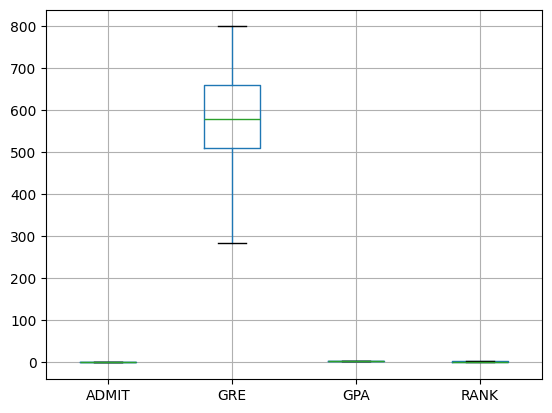

In [13]:
df.boxplot()
plt.show()

In [14]:
### scaling
from sklearn.preprocessing import StandardScaler
std_sca=StandardScaler()
df[['GRE','GPA']]=std_sca.fit_transform(df[['GRE','GPA']])

In [15]:
features= df.drop(columns=['ADMIT'])
target=df[['ADMIT']]

In [16]:
df.head()

,ADMIT,GRE,GPA,RANK
0,0,-1.799520,0.593079,3
1,1,0.638788,0.752214,3
2,1,1.857942,1.627456,1
3,1,0.464623,-0.520864,4
4,0,-0.580366,-1.210449,4


In [17]:
### train_test_split
x_train,x_test,y_train,y_test= train_test_split(features,target,train_size=0.75,random_state=100)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(296, 3)
(99, 3)
(296, 1)
(99, 1)


In [18]:
log_model=LogisticRegression()

In [19]:
log_model.fit(x_train,y_train)

LogisticRegression()

In [20]:
log_model.coef_

array([[ 0.28018318,  0.23826577, -0.54193893]])

In [21]:
y_pred= log_model.predict(x_test)
y_pred

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0])

In [22]:
accuracy_score(y_test,y_pred)

0.6868686868686869

In [23]:
### changing the thershold
y_pred1= [1 if x[1]>=0.45 else 0 for x in log_model.predict_proba(x_test)]
print(y_pred1)

[0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0]


In [24]:
accuracy_score(y_test,y_pred1)

0.696969696969697

In [25]:
## cost function of log_model
log_loss(y_test,log_model.predict_proba(x_test))

0.5818085846080381

In [26]:
log_model.predict_proba(x_test)

array([[0.68719018, 0.31280982],
       [0.44924749, 0.55075251],
       [0.6922723 , 0.3077277 ],
       [0.45414592, 0.54585408],
       [0.73119323, 0.26880677],
       [0.7788078 , 0.2211922 ],
       [0.37328443, 0.62671557],
       [0.83391981, 0.16608019],
       [0.79893013, 0.20106987],
       [0.7902592 , 0.2097408 ],
       [0.78115657, 0.21884343],
       [0.81649484, 0.18350516],
       [0.77074302, 0.22925698],
       [0.75923632, 0.24076368],
       [0.87806271, 0.12193729],
       [0.94187388, 0.05812612],
       [0.63974379, 0.36025621],
       [0.56812558, 0.43187442],
       [0.78315044, 0.21684956],
       [0.44207841, 0.55792159],
       [0.89819873, 0.10180127],
       [0.73401329, 0.26598671],
       [0.8427214 , 0.1572786 ],
       [0.85503926, 0.14496074],
       [0.64219552, 0.35780448],
       [0.83824987, 0.16175013],
       [0.80794674, 0.19205326],
       [0.85488104, 0.14511896],
       [0.57474617, 0.42525383],
       [0.90590535, 0.09409465],
       [0.

In [27]:
df.ADMIT.value_counts()

,count
ADMIT,
0,271
1,124


In [28]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns

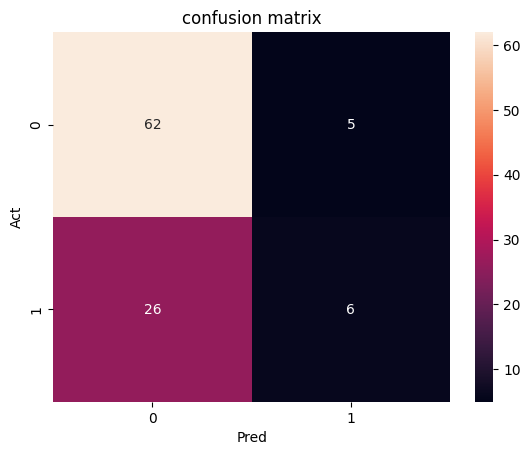

In [29]:
conf=confusion_matrix(y_test,y_pred)
sns.heatmap(conf,annot=True)
plt.xlabel('Pred')
plt.ylabel('Act')
plt.title('confusion matrix')
plt.show()

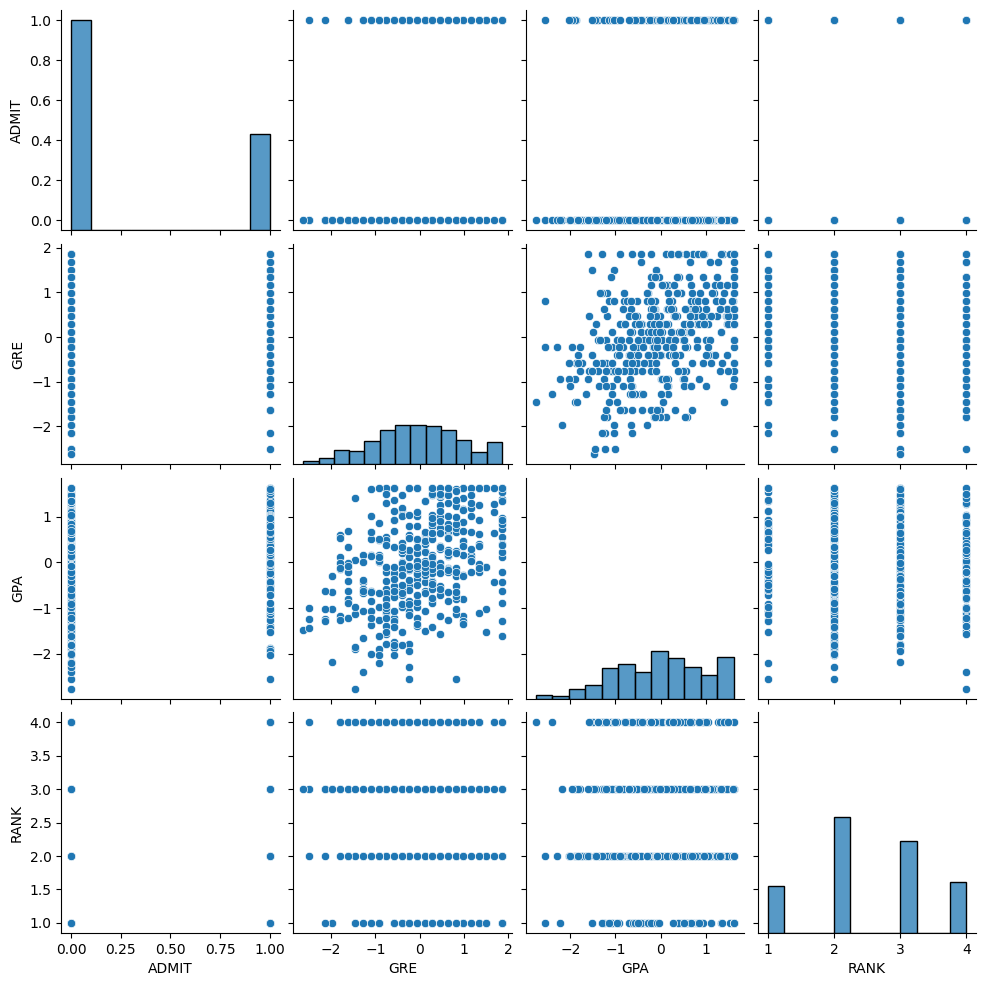

In [30]:
sns.pairplot(df)
plt.show()

In [31]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.93      0.80        67
           1       0.55      0.19      0.28        32

    accuracy                           0.69        99
   macro avg       0.62      0.56      0.54        99
weighted avg       0.65      0.69      0.63        99



### ROC Curve

In [32]:

from sklearn.metrics import roc_auc_score,roc_curve

In [33]:
sigmoid=log_model.predict_proba(x_test)[:,1]

In [34]:
auc_score= roc_auc_score(y_test,sigmoid)
auc_score

np.float64(0.6870335820895522)

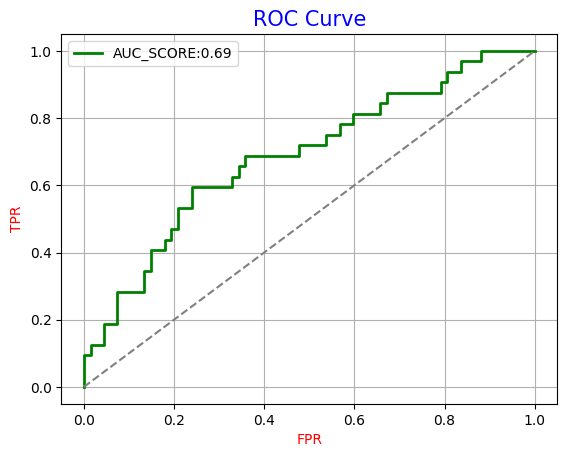

In [35]:
fpr,tpr,thr=roc_curve(y_test,sigmoid)
plt.plot(fpr,tpr,linewidth=2,color='green',label=f'AUC_SCORE:{auc_score:.2f}')
plt.plot([0,1],linestyle='--',color='grey')
plt.xlabel('FPR',size=10,color='red')
plt.ylabel('TPR',size=10,color='red')
plt.title('ROC Curve',size=15,color='blue')
plt.grid()
plt.legend()
plt.show()

In [36]:
!pip install imblearn

In [37]:
from imblearn.over_sampling import SMOTE,RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [38]:
y_train.value_counts()

,count
ADMIT,
0,204
1,92


In [39]:
### SMOTE
smote=SMOTE()
x_train_new,y_train_new=smote.fit_resample(x_train,y_train)

In [40]:
y_train_new.value_counts()

,count
ADMIT,
0,204
1,204


In [41]:
## RandomOversampling
random_over=RandomOverSampler()
x_train_new,y_train_new=random_over.fit_resample(x_train,y_train)

In [42]:
y_train_new.value_counts()

,count
ADMIT,
0,204
1,204


In [43]:
## Randomsling
random_over=RandomOverSampler()
x_train_new,y_train_new=random_over.fit_resample(x_train,y_train)